<a href="https://colab.research.google.com/github/SOMU1018/numpy/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

bathulasomasekhar_origins_path = kagglehub.dataset_download('bathulasomasekhar/origins')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/origins/origins.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/kaggle/input/origins/origins.csv')


In [ ]:
df.head()


,Track ID,Track Name,Album Name,Artist Name(s),Release Date,Duration (ms),Popularity,Added By,Added At,Genres,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,5Eg4TsPcqNbIjd8ADMZosg,Chains,Nick Jonas X2,Nick Jonas,2015-11-20,203106,55,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,"dance pop,pop",...,0,-5.884,0,0.0454,0.0153,0.000000,0.0757,0.120,76.003,4
1,3V3iy4K6paycRmTyrjQVwi,Secrets,Heart On My Sleeve (Deluxe),Mary Lambert,2014-10-14,223405,39,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,neo mellow,...,0,-5.900,1,0.0410,0.0260,0.000135,0.2150,0.713,93.229,4
2,2f0GI2ZLUtbGqFx8t2Gk6A,I Know Places (Taylor's Version),1989 (Taylor's Version),Taylor Swift,2023-10-26,195700,63,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,pop,...,0,-5.348,1,0.0574,0.0846,0.000000,0.0710,0.626,160.015,4
3,2Od3Imc5PJeZhRPeIhpgN6,Delta 1406,31 Minutes to Takeoff,Mike Posner,2010-08-09,184546,19,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,"dance pop,pop,pop dance,pop rap",...,1,-7.334,1,0.0451,0.0138,0.000461,0.1210,0.205,87.043,4
4,5hw1uOFZK3odNqXa4sF2JZ,Stay With Me - Re-record,In The Lonely Hour (10th Anniversary Edition /...,Sam Smith,2024-08-30,172760,38,95fvnclitpzdbgd83xcozdsk2,2024-11-29T00:19:04Z,"pop,uk pop",...,0,-7.121,1,0.0411,0.5550,0.000041,0.1030,0.246,84.837,4


In [ ]:
df.isnull().sum()


Track ID                 0
Track Name               0
Album Name               0
Artist Name(s)           0
Release Date             0
Duration (ms)            0
Popularity               0
Added By                 0
Added At                 0
Genres                  24
Record Label             0
\t\t\t\tDanceability     0
Energy                   0
Key                      0
Loudness                 0
Mode                     0
Speechiness              0
Acousticness             0
Instrumentalness         0
Liveness                 0
Valence                  0
Tempo                    0
Time Signature           0
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track ID          265 non-null    object 
 1   Track Name        265 non-null    object 
 2   Album Name        265 non-null    object 
 3   Artist Name(s)    265 non-null    object 
 4   Release Date      265 non-null    object 
 5   Duration (ms)     265 non-null    int64  
 6   Popularity        265 non-null    int64  
 7   Added By          265 non-null    object 
 8   Added At          265 non-null    object 
 9   Genres            241 non-null    object 
 10  Record Label      265 non-null    object 
 11  				Danceability  265 non-null    float64
 12  Energy            265 non-null    float64
 13  Key               265 non-null    int64  
 14  Loudness          265 non-null    float64
 15  Mode              265 non-null    int64  
 16  Speechiness       265 non-null    float64
 1

In [ ]:
df.describe()


,Duration (ms),Popularity,\t\t\t\tDanceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,219547.588679,31.713208,0.533826,0.622004,5.509434,-6.840958,0.630189,0.049629,0.259946,0.030620,0.161071,0.395371,117.955019,3.947170
std,38044.365353,20.982695,0.133051,0.171945,3.521700,2.406411,0.483667,0.033471,0.286262,0.131287,0.100932,0.200747,35.979480,0.375683
min,127931.000000,0.000000,0.174000,0.152000,0.000000,-16.550000,0.000000,0.024300,0.000013,0.000000,0.030400,0.037000,65.527000,1.000000
25%,195320.000000,15.000000,0.442000,0.524000,2.000000,-7.937000,0.000000,0.031700,0.019800,0.000000,0.097300,0.230000,88.003000,4.000000
50%,218040.000000,31.000000,0.536000,0.637000,6.000000,-6.353000,1.000000,0.038900,0.121000,0.000011,0.118000,0.384000,100.102000,4.000000
75%,238266.000000,47.000000,0.620000,0.766000,8.000000,-5.254000,1.000000,0.052300,0.443000,0.000575,0.190000,0.521000,151.977000,4.000000
max,485333.000000,83.000000,0.890000,0.970000,11.000000,-1.395000,1.000000,0.284000,0.935000,0.942000,0.692000,0.975000,201.998000,5.000000


In [ ]:
df.duplicated().sum()


0

In [ ]:
df['Energy'].fillna(df['Key'].mean(), inplace=True)


In [ ]:
df.dropna(inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)


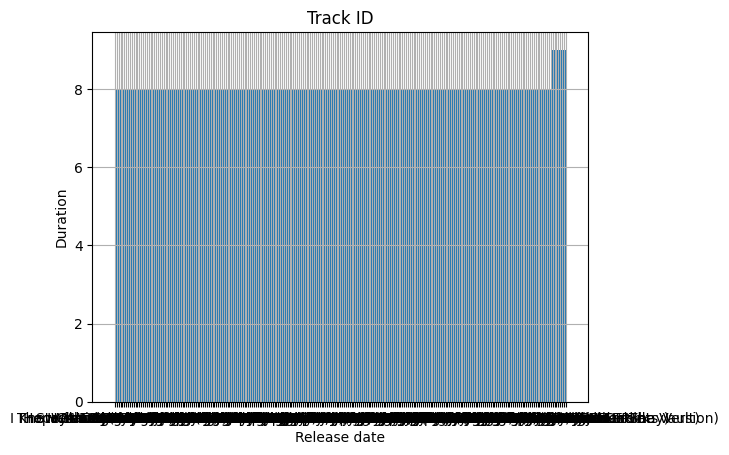

In [ ]:
df['Track Name'].hist(bins=30)
plt.title('Track ID')
plt.xlabel('Release date')
plt.ylabel('Duration')
plt.show()

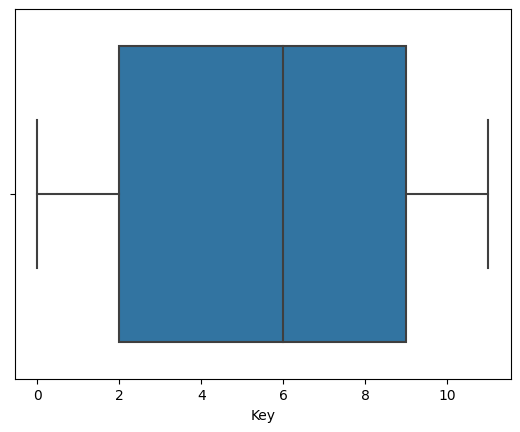

In [ ]:
sns.boxplot(x=df['Key'])
plt.show()

Track ID                 object
Track Name               object
Album Name               object
Artist Name(s)           object
Release Date             object
Duration (ms)             int64
Popularity                int64
Added By                 object
Added At                 object
Genres                   object
Record Label             object
\t\t\t\tDanceability    float64
Energy                  float64
Key                       int64
Loudness                float64
Mode                      int64
Speechiness             float64
Acousticness            float64
Instrumentalness        float64
Liveness                float64
Valence                 float64
Tempo                   float64
Time Signature            int64
dtype: object


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


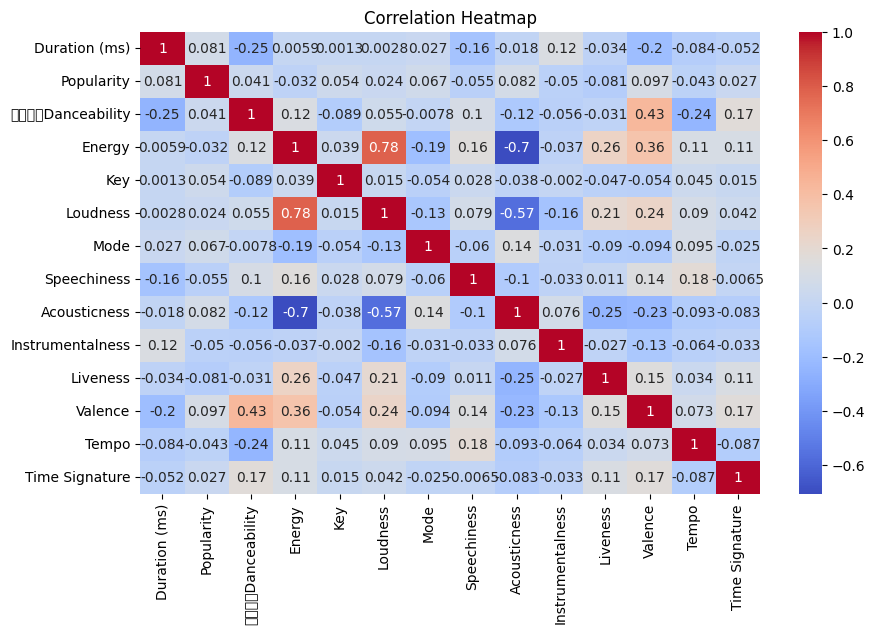

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/kaggle/input/origins/origins.csv')

# Check the data types of each column
print(df.dtypes)

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate and plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



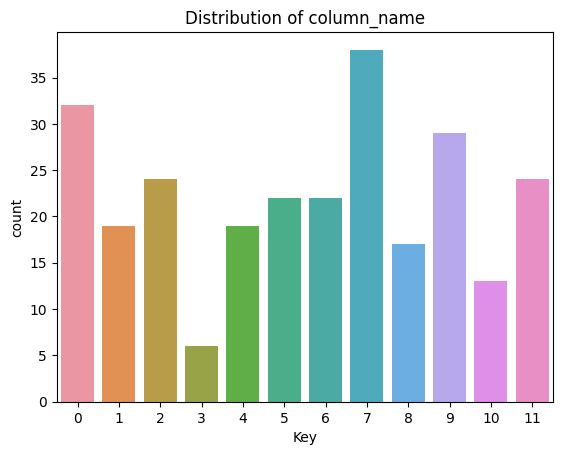

In [ ]:
sns.countplot(x='Key', data=df)
plt.title('Distribution of column_name')
plt.show()


In [ ]:
df.to_csv('cleaned_dataset.csv', index=False)
